<hr/>

# Data Mining  [EN.550.636.01]

10/24/2019

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 10:00am ~ 11:00am

- **Decision Tree**
- **Random Forest**
- **Review of Classification**: Nearest Neighbor, Naive Bayes, LDA, QDA
- **Exercises**
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [3]:
iris = datasets.load_iris()

In [4]:
# 4 features in total
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# 3 class each with 50 observation
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

<h2><font color="darkblue">Decision Tree</font></h2>
<hr/>

- **Intuition:** Look for the best split for the data

<img src='https://congm.github.io/teaching/Data%20Mining/files/iris.png' width=800 align=center>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

- **Classification criteria:** At a given node with dataset $D$ we want to find the best split $ \quad \theta = (\text{feature} \  j, \text{threshold} \  t) \quad $ to minimize impurity
> $ \displaystyle I(\theta) = \frac{n_{\text{left}}}{n}\, H \left(D_{\text{left}}(\theta) \right) + \frac{n_{\text{right}}}{n}\, H \left(D_{\text{right}}(\theta) \right) $

In [6]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=4)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

<img src='https://congm.github.io/teaching/Data%20Mining/files/iris.png' width=800 align=center>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

In [7]:
clf.tree_.impurity

array([ 0.66666667,  0.        ,  0.5       ,  0.16803841,  0.04079861,
        0.        ,  0.        ,  0.44444444,  0.        ,  0.44444444,
        0.        ,  0.        ,  0.04253308,  0.44444444,  0.        ,
        0.        ,  0.        ])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# -2 means leaf
clf.tree_.feature

array([ 2, -2,  3,  2,  3, -2, -2,  3, -2,  0, -2, -2,  2,  1, -2, -2, -2])

In [10]:
# -2 means leaf
clf.tree_.threshold

array([ 2.45000005, -2.        ,  1.75      ,  4.94999981,  1.6500001 ,
       -2.        , -2.        ,  1.54999995, -2.        ,  6.94999981,
       -2.        , -2.        ,  4.85000038,  3.0999999 , -2.        ,
       -2.        , -2.        ])

In [11]:
# The higher, the more important the feature
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
# It is also known as the Gini importance
clf.feature_importances_

array([ 0.01333333,  0.01333333,  0.55072262,  0.42261071])

- **Note:** For `DecisionTreeClassifier` in scikit-learn
> The default values for the parameters controlling the size of the trees (e.g. `max_depth`, `min_samples_leaf`, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
>
> The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and `max_features=n_features`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- **Example**

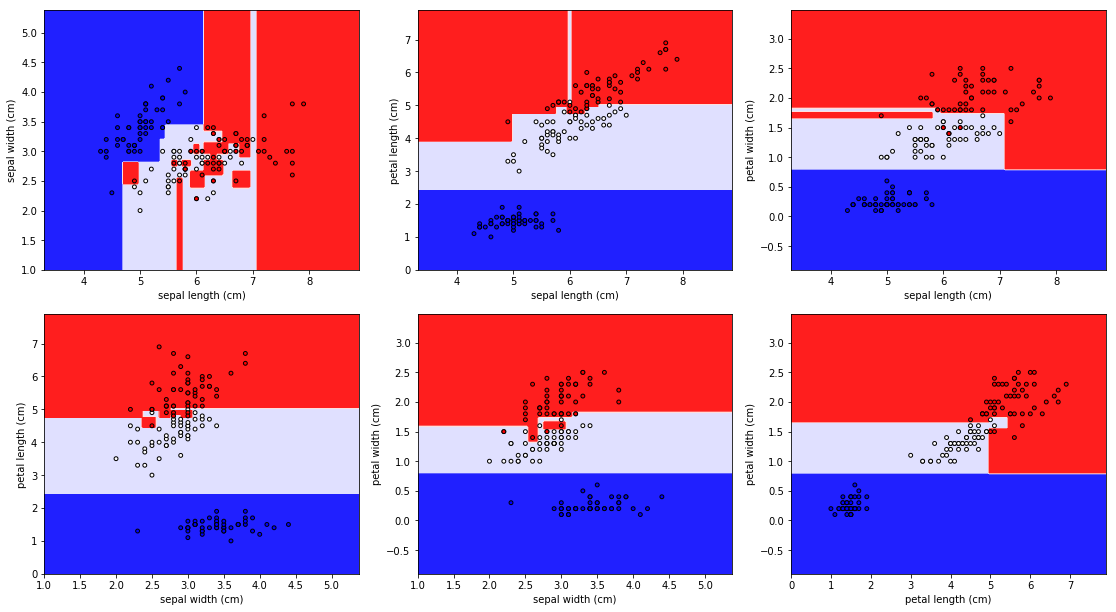

In [12]:
# Figure size
figure(figsize=(16, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # Only take two features each time
    X = iris.data[:, pair]
    y = iris.target

    # Train classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y);
    
    # Generate grid data
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    # Predict the class for grid data
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    subplot(2, 3, pairidx + 1);
    contourf(xx, yy, Z, cmap=cm.bwr);
    xlabel(iris.feature_names[pair[0]]);
    ylabel(iris.feature_names[pair[1]]);
    tight_layout(h_pad=1, w_pad=1, pad=2.5);

    # Plot the training points
    scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr, edgecolor='black', s=15);

<h2><font color="darkblue">Random Forest</font></h2>
<hr/>

- **Intuition:** Build multiple randomized trees and combine the result

In [13]:
clf = ensemble.RandomForestClassifier(n_estimators=10, bootstrap=True, criterion='gini', max_depth=None, random_state=2018)
clf.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
clf.feature_importances_

array([ 0.05744432,  0.02029045,  0.54059988,  0.38166536])

- **Number of Tree**

In [16]:
# Save the result
result = pd.DataFrame()

# Try different number of tree
for n in range(10, 110, 10):
    start = datetime.datetime.now()
    clf = ensemble.RandomForestClassifier(n_estimators=n, random_state=n)
    clf.fit(iris.data, iris.target);
    time = datetime.datetime.now() - start
    cvscore = cross_val_score(clf, iris.data, iris.target, cv=10).mean()
    result = result.append(pd.DataFrame(data=[[n, cvscore, time]], columns=['Trees', 'Scores', 'Time']))

In [17]:
result

,Trees,Scores,Time
0,10,0.953333,00:00:00.016679
0,20,0.960000,00:00:00.026730
0,30,0.953333,00:00:00.039379
0,40,0.953333,00:00:00.057384
0,50,0.966667,00:00:00.069284
0,60,0.966667,00:00:00.085070
0,70,0.960000,00:00:00.090747
0,80,0.966667,00:00:00.104502
0,90,0.966667,00:00:00.129833
0,100,0.960000,00:00:00.130170


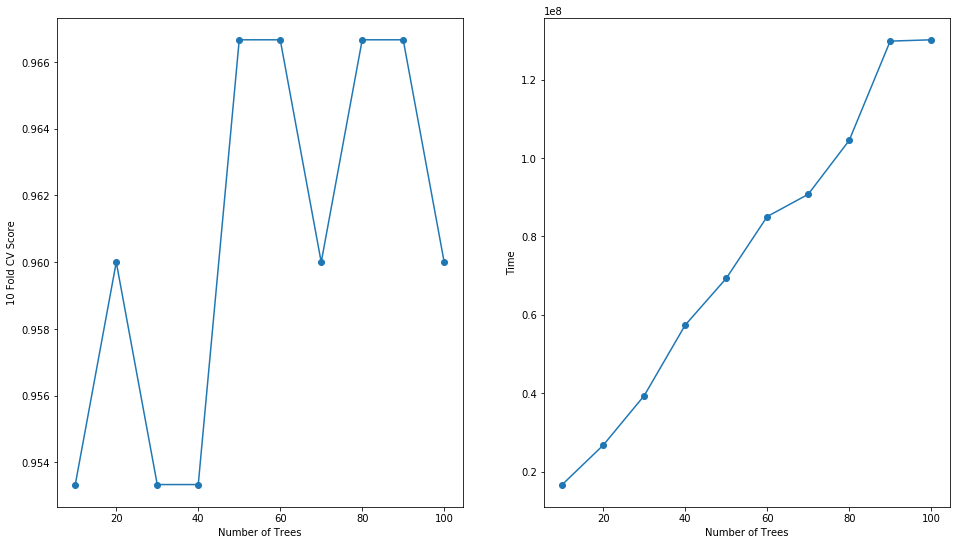

In [18]:
figure(figsize=(16, 9));
subplot(121);
plot(result.Trees, result.Scores, 'o-');
xlabel('Number of Trees');
ylabel('10 Fold CV Score');
subplot(122);
plot(result.Trees, result.Time, 'o-');
xlabel('Number of Trees');
ylabel('Time');

- **Example**

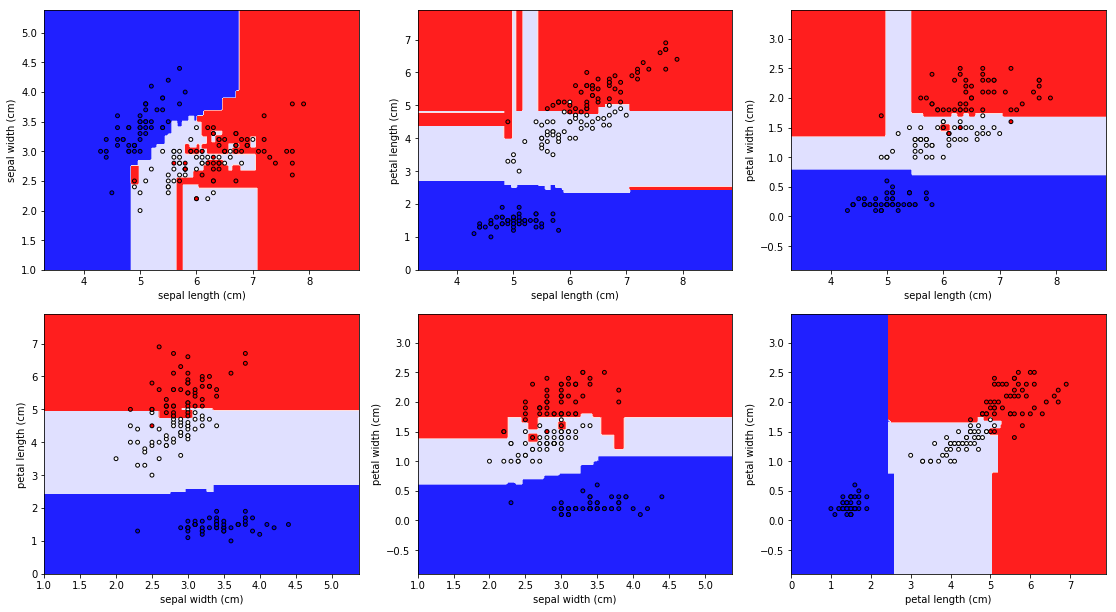

In [19]:
# Figure size
figure(figsize=(16, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # Only take two features each time
    X = iris.data[:, pair]
    y = iris.target

    # Train classifier
    clf = ensemble.RandomForestClassifier()
    clf.fit(X, y);
    
    # Generate grid data
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    # Predict the class for grid data
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    subplot(2, 3, pairidx + 1);
    contourf(xx, yy, Z, cmap=cm.bwr);
    xlabel(iris.feature_names[pair[0]]);
    ylabel(iris.feature_names[pair[1]]);
    tight_layout(h_pad=1, w_pad=1, pad=2.5);

    # Plot the training points
    scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr, edgecolor='black', s=15);

- **Note:** For `RandomForestClassifier` in scikit-learn
> The default values for the parameters controlling the size of the trees (e.g. `max_depth`, `min_samples_leaf`, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
>
> The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and `max_features=n_features` and `bootstrap=False`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<h2><font color="darkblue">Review of Classification</font></h2>
<hr/>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

### Nearest Neighbor

- Data
> $ X = (x_{ij})_{n \times m} $

- For each data point with unknown label 
> Calculate its distance with data points with known label
>
> Find the $ k $ nearest neighbor ($ k $ minimal distance)

- Classify the unknown data point based on the label of the $ k $ nearest neighbor (vote)
> Uniform: All points in each neighborhood are weighted equally
>
> Distance: Weight points by the inverse of their distance
>
> Self-defined

- Example

In [22]:
# Toy Example
knn = pd.DataFrame()

for k in range(1,11):
    
    model1 = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2)   # p: which Minkowski p-norm to use
    model2 = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2) 
    
    cvscores1 = cross_val_score(model1, X, y, cv=10)
    cvscores2 = cross_val_score(model2, X, y, cv=10)
    
    # Save the result
    knn = knn.append(pd.DataFrame(data=[[k, 'uniform', cvscores1.mean()]], columns=['k','weights', '10-fold CV score']))
    knn = knn.append(pd.DataFrame(data=[[k, 'distance', cvscores2.mean()]], columns=['k','weights', '10-fold CV score']))

knn.index = arange(1,21)

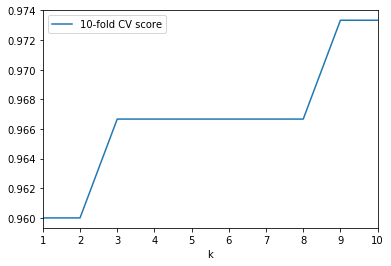

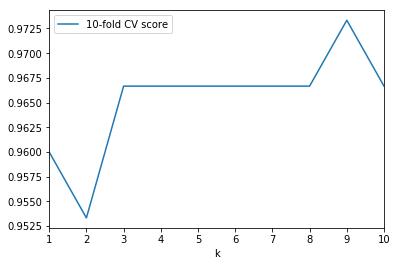

In [23]:
knn.groupby('weights').plot(x='k');

- **Note:** For `KNeighborsClassifier` in scikit-learn, `weights` could be
> ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally
>
> ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away
>
> 'callable' : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Naive Bayes

- Fit
> Estimate the parameters in each class

- Predict
> For each unlabeled data, calculate the posterior for each class
>
> Classify the data with class k having the largest posterior

- Assumption
> Features are independent

- Example

In [24]:
# Specify the model
clf = GaussianNB(priors=None)

# Fit
clf.fit(iris.data, iris.target)

# Predict
pred = clf.predict(iris.data)

print('Classifier: GNB')
print('Number of mislabeled points out of a total %d points : %d' % (iris.target.size, (iris.target!=pred).sum()))
print('Accuracy: ', mean(iris.target==pred))

Classifier: GNB
Number of mislabeled points out of a total 150 points : 6
Accuracy:  0.96


### Linear Discriminant Analysis & Quadratic Discriminant Analysis

- Fit
> Estimate the parameters in each class

- Predict
> For each unlabeled data, calculate the log-likelihood for each class
>
> Classify the data with class k having the largest log-likelihood

- Difference
> LDA: same covariance matrix in different classes
>
> QDA: different covariance matrix in different classes

- Example

In [25]:
# Specify the model
clf = LinearDiscriminantAnalysis(priors=None)

# Fit
clf.fit(iris.data, iris.target)

# Predict
pred = clf.predict(iris.data)

print('Classifier: LDA')
print('Number of mislabeled points out of a total %d points : %d' % (iris.target.size, (iris.target!=pred).sum()))
print('Accuracy: ', mean(iris.target==pred))

Classifier: LDA
Number of mislabeled points out of a total 150 points : 3
Accuracy:  0.98


In [26]:
# Specify the model
clf = QuadraticDiscriminantAnalysis(priors=None)

# Fit
clf.fit(iris.data, iris.target)

# Predict
pred = clf.predict(iris.data)

print('Classifier: QDA')
print('Number of mislabeled points out of a total %d points : %d' % (iris.target.size, (iris.target!=pred).sum()))
print('Accuracy: ', mean(iris.target==pred))

Classifier: QDA
Number of mislabeled points out of a total 150 points : 3
Accuracy:  0.98


<h2><font color="darkblue">Exercises</font></h2>
<hr/>

### Exercise 1

In [27]:
from sklearn.datasets import make_blobs

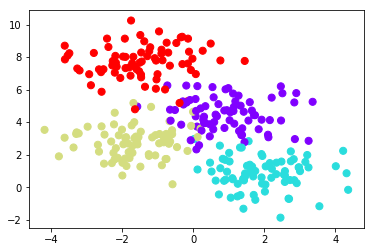

In [28]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow');

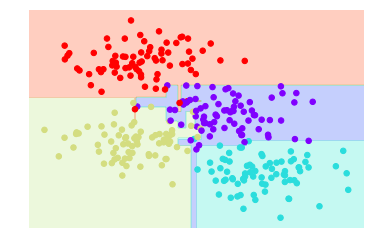

In [29]:
ax = plt.gca()
cmap = 'rainbow'

# Data points
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tree classifier
model = DecisionTreeClassifier().fit(X, y)
xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5, cmap=cmap, zorder=1)

ax.set(xlim=xlim, ylim=ylim);

### Exercise 2
[Reference](https://medium.com/@randerson112358/python-decision-tree-classifier-example-d73bc3aeca6)

In [30]:
# !conda install python-graphviz "-y"

In [31]:
# !conda install pydotplus "-y"

In [30]:
# To create our Decision Tree Graph
import pydotplus

# To Display a image of our graph
from IPython.display import Image  

In [31]:
# Create the dataset
golf_df = pd.DataFrame()

# Add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

# Add temperature
golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                         'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

# Add humidity
golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                      'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

# Add windy
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

# Add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']


In [32]:
golf_df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [33]:
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
one_hot_data = pd.get_dummies(golf_df[['Outlook', 'Temperature', 'Humidity', 'Windy']])

# Dummy data
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [34]:
# The decision tree classifier
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, golf_df['Play'])

In [35]:
# Print a decision tree in DOT format
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[6] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 6 ;
7 [label="X[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 8 ;
9 [label="X[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
9 -> 11 ;
12 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
0 -> 12 [labeldistance=

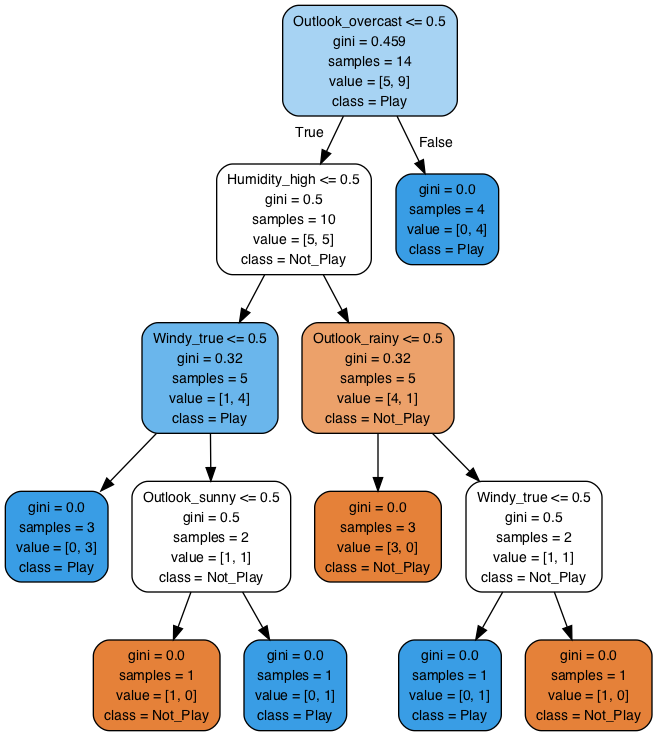

In [36]:
# Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) 

# Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [37]:
# Prediction with following input
# Outlook=sunny, Temperature=hot, Humidity=normal, Windy=false
prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1,0]])
prediction

array(['yes'], dtype=object)